# Импортирование библиотек

In [68]:
# импорт библиотек 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm, trange
from sklearn.metrics import mean_squared_error

pd.options.display.max_rows = 67
pd.options.display.max_columns = 67

# Импортирование данных

In [24]:
# Считывание данных в датафрейм
df = pd.read_csv('df.csv')

In [25]:
# Просмотр первых 5 значений
df.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level,location,continent,date
0,5.0,0.0,0.714,2.0,0.0,0.571,0.126,0.0,0.018,0.05,1301.0,1367.0,1367.0,39835428.0,18.6,2.581,1.337,0.511,737485,0,1,0,Afghanistan,Asia,2020-03-01
1,5.0,0.0,0.000,2.0,0.0,0.571,0.126,0.0,0.000,0.05,1301.0,1367.0,1367.0,39835428.0,18.6,2.581,1.337,0.511,737486,0,1,0,Afghanistan,Asia,2020-03-02
2,5.0,0.0,0.000,2.0,0.0,0.571,0.126,0.0,0.000,0.05,1301.0,1367.0,1367.0,39835428.0,18.6,2.581,1.337,0.511,737487,0,1,0,Afghanistan,Asia,2020-03-03
3,5.0,0.0,0.000,2.0,0.0,0.571,0.126,0.0,0.000,0.05,1301.0,1367.0,1367.0,39835428.0,18.6,2.581,1.337,0.511,737488,0,1,0,Afghanistan,Asia,2020-03-04
4,5.0,0.0,0.000,2.0,0.0,0.571,0.126,0.0,0.000,0.05,1301.0,1367.0,1367.0,39835428.0,18.6,2.581,1.337,0.511,737489,0,1,0,Afghanistan,Asia,2020-03-05


In [26]:
df.shape

(154447, 25)

# Деление данных

In [27]:
# В x беру те признаки, которые не изменяются со временем
X = df[['Code_Location', 'dateAsInt', 'population', 'median_age', 'aged_65_older', 'aged_70_older', 'human_development_index']]
y = df['new_cases']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3.1 Построение регрессионной модели

## RandomForestRegressor

In [102]:
forest = RandomForestRegressor(n_estimators=100, max_features ='sqrt', random_state=0).fit(x_train, y_train)
print(r2_score(y_test, forest.predict(x_test)))

0.8687199448042546


In [200]:
print(mean_absolute_error(y_test, forest.predict(x_test)))

741.6474073594476


In [67]:
%%time
best_result = 10000
best_depth = 0
best_model = None
best_est = 0
for est in tqdm(range(1, 101, 10)):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=0, n_estimators=est,max_depth=depth)
        model.fit(x_train, y_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(x_test) # получите предсказания модели на валидационной выборке
        result = mean_squared_error(y_test, predictions_valid) ** 0.5 # посчитайте значение метрики rmse на валидационной выборке
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
        
        
print("RMSE наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

  0%|          | 0/10 [00:00<?, ?it/s]

RMSE наилучшей модели на валидационной выборке: 7356.083303288747 Количество деревьев: 61 Максимальная глубина: 10
CPU times: total: 7min 20s
Wall time: 7min 45s


In [34]:
best_model

RandomForestRegressor(max_depth=10, n_estimators=60, random_state=0)

In [78]:
forest = RandomForestRegressor(n_estimators=61, random_state=0).fit(x_train, y_train)
print(r2_score(y_test, forest.predict(x_test)))

0.870648335142755


In [79]:
print(mean_absolute_error(y_test, forest.predict(x_test)))

751.2125553922167


In [80]:
print((mean_squared_error(forest.predict(x_test), y_test)) ** 0.5) 

7185.771469486591


## KNeighborsRegressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor
kmeans = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)
print(r2_score(y_test, kmeans.predict(x_test)))

0.8632265327456831


In [82]:
print(mean_absolute_error(y_test, kmeans.predict(x_test)))

798.6669544260998


In [83]:
print((mean_squared_error(kmeans.predict(x_test), y_test)) ** 0.5) 

7389.045111625268


# DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
print(r2_score(y_test, model.predict(x_test)))

0.8074670825574878


In [85]:
print(mean_absolute_error(y_test, model.predict(x_test)))

880.112204596957


In [87]:
print((mean_squared_error(model.predict(x_test), y_test)) ** 0.5) 

8766.775506731776


### Оценку будем производить с помощью коэффициента детерминации (R-квадрат). Коэффициент принимает значение на промежутке [0,1] и чем он ближе к 1 тем сильнее зависимость. Следовательно выбираем RandomForestRegressor

### Также будет использоваться MSE - это среднее значение абсолютных различий между фактическим значением и прогнозируемым значением модели. Чем меньше тем лучше. Здесь также наилучший результат имеет RandomForestRegressor

# 3.2 Визуализация работы регрессионной модели

In [43]:
# Берутся данные по России
new_data = df[df['location'] == 'Russia'][df.columns]

In [44]:
# Дата в формат
new_data['date'] = pd.to_datetime(new_data['date'],format='%Y.%m.%d') 

In [45]:
new_data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level,location,continent,date
114927,2.0,0.0,0.286,64685.0,16.0,46.286,0.014,0.0,0.002,3381.732,42939.0,1208.0,16768.0,145912022.0,39.6,14.178,9.393,0.824,737461,165,2,1,Russia,Europe,2020-02-06
114928,2.0,0.0,0.000,64685.0,16.0,46.286,0.014,0.0,0.000,3381.732,42939.0,1208.0,16768.0,145912022.0,39.6,14.178,9.393,0.824,737462,165,2,1,Russia,Europe,2020-02-07
114929,2.0,0.0,0.000,64685.0,16.0,46.286,0.014,0.0,0.000,3381.732,42939.0,1208.0,16768.0,145912022.0,39.6,14.178,9.393,0.824,737463,165,2,1,Russia,Europe,2020-02-08
114930,2.0,0.0,0.000,64685.0,16.0,46.286,0.014,0.0,0.000,3381.732,42939.0,1208.0,16768.0,145912022.0,39.6,14.178,9.393,0.824,737464,165,2,1,Russia,Europe,2020-02-09
114931,2.0,0.0,0.000,64685.0,16.0,46.286,0.014,0.0,0.000,3381.732,42939.0,1208.0,16768.0,145912022.0,39.6,14.178,9.393,0.824,737465,165,2,1,Russia,Europe,2020-02-10


In [46]:
sns.set(rc={"figure.figsize":(14, 6)})

## График без продления

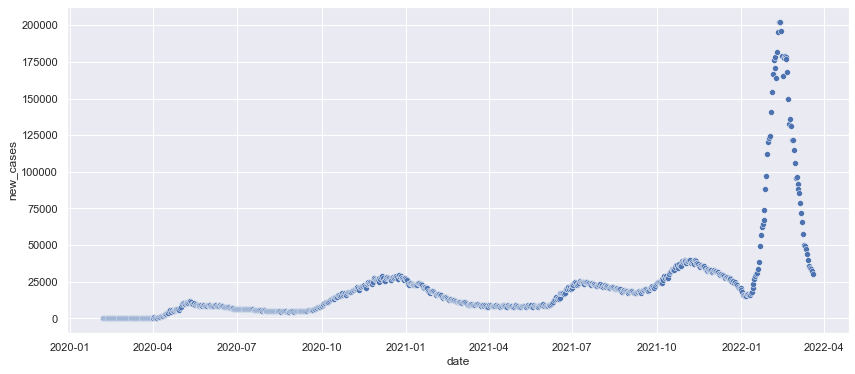

In [47]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

## Добавлнение новых дат

In [48]:
new_data['date'] = pd.to_datetime(new_data['date']) 

In [49]:
# Создание датафрейма для прогнозирования, в котором дата продалжается на след 70 дней
pred_df = pd.DataFrame(columns=['Code_Location', 'dateAsInt', 'population', 'median_age', 'aged_65_older', 'aged_70_older', 'human_development_index', 'location', 'new_cases', 'date'])
for i in range(70):
    #Прибавление дня к предыдущей строке
    pred_df['date'] = new_data['date'] + pd.to_timedelta(i,unit='d')
    pred_df['location'] = df['location']

## Дата в int

In [50]:
pred_df['human_development_index'] = new_data['human_development_index']

In [51]:
pred_df['Code_Location'] = new_data['Code_Location']

In [52]:
pred_df['dateAsInt'] = pred_df['date'].apply(lambda x:x.toordinal())

In [53]:
pred_df['population'] = new_data['population']

In [54]:
pred_df['median_age'] = new_data['median_age']
pred_df['aged_65_older'] = new_data['aged_65_older']
pred_df['aged_70_older'] = new_data['aged_70_older']

In [55]:
pred_df.head()

,Code_Location,dateAsInt,population,median_age,aged_65_older,aged_70_older,human_development_index,location,new_cases,date
114927,165,737530,145912022.0,39.6,14.178,9.393,0.824,Russia,NaN,2020-04-15
114928,165,737531,145912022.0,39.6,14.178,9.393,0.824,Russia,NaN,2020-04-16
114929,165,737532,145912022.0,39.6,14.178,9.393,0.824,Russia,NaN,2020-04-17
114930,165,737533,145912022.0,39.6,14.178,9.393,0.824,Russia,NaN,2020-04-18
114931,165,737534,145912022.0,39.6,14.178,9.393,0.824,Russia,NaN,2020-04-19


## Предсказывание с помощью модели

In [56]:
pred_df['new_cases'] = forest.predict(pred_df.drop(columns=['new_cases', 'location', 'date'], axis=1))

In [57]:
#pred_df.drop(columns=['location', 'dateAsInt'], inplace=True)

In [58]:
new_data = new_data.append(pred_df)

C:\Users\1\AppData\Local\Temp\ipykernel_224\2287257286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(pred_df)


In [59]:
new_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,7.740000e+02,1548.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,7.740000e+02,7.740000e+02,774.000000,1548.0,1.548000e+03,1548.000,1548.000,1.548000e+03,1548.000000,1548.0,774.0,774.000000
mean,4.625083e+06,24194.486779,22259.728509,116255.281654,462.410853,462.506654,31697.752218,153.429444,152.555828,956.198146,3.655837e+05,2.095733e+05,108831.994832,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,737882.000000,165.0,2.0,1.155039
std,4.219931e+06,30718.141970,30968.722410,107352.570520,335.499923,332.707694,28921.062886,213.607390,212.242443,933.877660,1.690159e+05,2.541427e+05,124151.327864,0.0,7.107724e-15,0.000,0.000,1.110582e-16,226.155272,0.0,0.0,0.362176
min,2.000000e+00,0.000000,0.000000,1.000000,0.000000,0.286000,0.014000,0.000000,0.000000,0.007000,4.364000e+03,1.208000e+03,3357.000000,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,737461.000000,165.0,2.0,1.000000
25%,9.267375e+05,8541.000000,8062.071750,20338.250000,149.250000,144.178500,6351.344500,54.358250,55.253250,139.387000,2.800008e+05,1.208000e+03,16768.000000,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,737688.750000,165.0,2.0,1.000000
50%,4.181462e+06,17822.791667,15238.500000,84115.000000,410.500000,409.214500,28657.415500,106.489000,104.436500,690.494500,3.461000e+05,8.853800e+04,60080.500000,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,737882.000000,165.0,2.0,1.000000
75%,6.960177e+06,27245.650000,24354.143000,186029.750000,738.500000,751.107000,47701.187750,168.200750,166.910000,1521.934250,4.775030e+05,3.488080e+05,159740.750000,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,738075.250000,165.0,2.0,1.000000
max,1.732769e+07,202211.000000,188712.429000,357234.000000,1222.000000,1217.571000,118754.396000,1385.842000,1293.330000,3381.732000,1.051732e+06,1.020075e+06,569281.000000,145912022.0,3.960000e+01,14.178,9.393,8.240000e-01,738303.000000,165.0,2.0,2.000000


## График с предсказанием

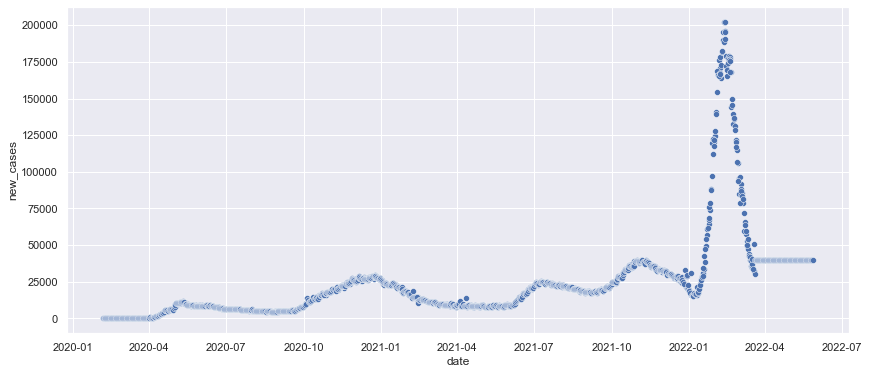

In [60]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

In [65]:
new_data[new_data['date'] > '1.05.2022']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level,location,continent,date
99884,830480.0,478.0,324.714,11602.0,1.0,1.714,27985.922,16.108,10.942,390.970,11695.0,218912.0,142759.0,29674920.0,25.0,5.809,3.212,0.602,738161,140,1,0,Nepal,Asia,2022-01-06
99885,831052.0,572.0,374.429,11602.0,0.0,1.143,28005.198,19.276,12.618,390.970,12536.0,218810.0,137027.0,29674920.0,25.0,5.809,3.212,0.602,738162,140,1,0,Nepal,Asia,2022-01-07
99886,831748.0,696.0,425.000,11602.0,0.0,1.143,28028.652,23.454,14.322,390.970,11437.0,218708.0,131295.0,29674920.0,25.0,5.809,3.212,0.602,738163,140,1,0,Nepal,Asia,2022-01-08
99887,832589.0,841.0,514.714,11604.0,2.0,1.143,28056.992,28.340,17.345,391.037,12151.0,218606.0,125563.0,29674920.0,25.0,5.809,3.212,0.602,738164,140,1,0,Nepal,Asia,2022-01-09
99888,833946.0,1357.0,667.000,11606.0,2.0,1.143,28102.721,45.729,22.477,391.105,11999.0,218504.0,119831.0,29674920.0,25.0,5.809,3.212,0.602,738165,140,1,0,Nepal,Asia,2022-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953,978085.0,41.0,53.714,11950.0,0.0,0.143,32959.988,1.382,1.810,402.697,7460.0,108373.0,18521.0,29674920.0,25.0,5.809,3.212,0.602,738230,140,1,0,Nepal,Asia,2022-03-16
99954,978107.0,22.0,45.857,11950.0,0.0,0.143,32960.729,0.741,1.545,402.697,7460.0,111586.0,20830.0,29674920.0,25.0,5.809,3.212,0.602,738231,140,1,0,Nepal,Asia,2022-03-17
99955,978119.0,12.0,38.714,11950.0,0.0,0.000,32961.134,0.404,1.305,402.697,7460.0,97575.0,18236.0,29674920.0,25.0,5.809,3.212,0.602,738232,140,1,0,Nepal,Asia,2022-03-18
99956,978127.0,8.0,35.571,11950.0,0.0,0.000,32961.403,0.270,1.199,402.697,7460.0,84278.0,16617.0,29674920.0,25.0,5.809,3.212,0.602,738233,140,1,0,Nepal,Asia,2022-03-19


In [61]:
# Второй пример работы модели
new_data = df[df['location'] == 'Nepal'][df.columns]

In [62]:
new_data['date'] = pd.to_datetime(new_data['date'],format='%Y.%m.%d') 

In [161]:
new_data

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level,location,continent,date
99185,1.0,0.0,0.143,4016.0,1.0,0.286,0.034,0.000,0.005,1552.171,1088.0,1619.0,561.0,29674920.0,25.0,5.809,3.212,0.602,737455,140,1,0,Nepal,Asia,2020-01-31
99186,1.0,0.0,0.000,4016.0,1.0,0.286,0.034,0.000,0.000,1552.171,1088.0,1619.0,561.0,29674920.0,25.0,5.809,3.212,0.602,737456,140,1,0,Nepal,Asia,2020-02-01
99187,1.0,0.0,0.000,4016.0,1.0,0.286,0.034,0.000,0.000,1552.171,1088.0,1619.0,561.0,29674920.0,25.0,5.809,3.212,0.602,737457,140,1,0,Nepal,Asia,2020-02-02
99188,1.0,0.0,0.000,4016.0,1.0,0.286,0.034,0.000,0.000,1552.171,1088.0,1619.0,561.0,29674920.0,25.0,5.809,3.212,0.602,737458,140,1,0,Nepal,Asia,2020-02-03
99189,1.0,0.0,0.000,4016.0,1.0,0.286,0.034,0.000,0.000,1552.171,2.0,1619.0,561.0,29674920.0,25.0,5.809,3.212,0.602,737459,140,1,0,Nepal,Asia,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953,978085.0,41.0,53.714,11950.0,0.0,0.143,32959.988,1.382,1.810,402.697,7460.0,108373.0,18521.0,29674920.0,25.0,5.809,3.212,0.602,738230,140,1,0,Nepal,Asia,2022-03-16
99954,978107.0,22.0,45.857,11950.0,0.0,0.143,32960.729,0.741,1.545,402.697,7460.0,111586.0,20830.0,29674920.0,25.0,5.809,3.212,0.602,738231,140,1,0,Nepal,Asia,2022-03-17
99955,978119.0,12.0,38.714,11950.0,0.0,0.000,32961.134,0.404,1.305,402.697,7460.0,97575.0,18236.0,29674920.0,25.0,5.809,3.212,0.602,738232,140,1,0,Nepal,Asia,2022-03-18
99956,978127.0,8.0,35.571,11950.0,0.0,0.000,32961.403,0.270,1.199,402.697,7460.0,84278.0,16617.0,29674920.0,25.0,5.809,3.212,0.602,738233,140,1,0,Nepal,Asia,2022-03-19


In [162]:
new_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.0,773.0,7.730000e+02,7.730000e+02,773.000,773.000000,773.0,773.0,773.0
mean,391135.953428,1265.170763,1265.077793,5426.390686,15.591203,15.495875,13180.691124,42.634345,42.631203,373.483607,8538.672704,51471.399741,28455.956016,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,737847.058215,140.0,1.0,0.0
std,344629.332070,1905.701463,1852.610800,4507.597792,38.483844,30.698065,11613.488161,64.219254,62.430179,488.852773,5585.272885,76056.007536,51870.764527,0.0,0.0,2.666260e-15,4.443767e-16,0.000,224.711111,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.034000,0.000000,0.000000,0.101000,1.000000,283.000000,0.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,737455.000000,140.0,1.0,0.0
25%,28257.000000,128.000000,132.714000,1508.000000,1.000000,0.857000,952.218000,4.313000,4.472000,50.817000,3965.000000,1619.000000,561.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,737655.000000,140.0,1.0,0.0
50%,274065.000000,476.000000,476.714000,4016.000000,5.000000,6.000000,9235.577000,16.040000,16.065000,279.866000,8816.000000,9611.000000,992.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,737848.000000,140.0,1.0,0.0
75%,773529.000000,1584.000000,1622.429000,10889.000000,14.000000,15.286000,26066.759000,53.378000,54.673000,390.127000,12263.000000,84389.000000,37786.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,738041.000000,140.0,1.0,0.0
max,978155.000000,10052.000000,8962.714000,11950.000000,619.000000,200.714000,32962.347000,338.737000,302.030000,1552.171000,25265.000000,387959.000000,447322.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,0.602,738234.000000,140.0,1.0,0.0


In [163]:
sns.set(rc={"figure.figsize":(14, 6)})

## График без продления

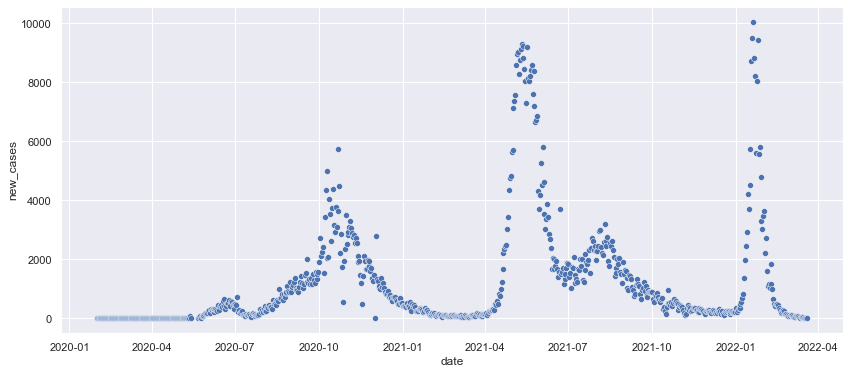

In [164]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

## Добавлнение новых дат

In [165]:
new_data['date'] = pd.to_datetime(new_data['date']) 

In [166]:
pred_df = pd.DataFrame(columns=['Code_Location', 'dateAsInt', 'population', 'median_age', 'aged_65_older', 'aged_70_older', 'human_development_index', 'location', 'new_cases', 'date'])
for i in range(70):
    #Прибавление дня к предыдущей строке
    pred_df['date'] = new_data['date'] + pd.to_timedelta(i,unit='d')
    pred_df['location'] = df['location']

## Дата в int

In [167]:
pred_df['human_development_index'] = new_data['human_development_index']

In [168]:
pred_df['Code_Location'] = new_data['Code_Location']

In [169]:
pred_df['dateAsInt'] = pred_df['date'].apply(lambda x:x.toordinal())

In [170]:
pred_df['population'] = new_data['population']

In [171]:
pred_df['median_age'] = new_data['median_age']
pred_df['aged_65_older'] = new_data['aged_65_older']
pred_df['aged_70_older'] = new_data['aged_70_older']

In [172]:
pred_df.head()

,Code_Location,dateAsInt,population,median_age,aged_65_older,aged_70_older,human_development_index,location,new_cases,date
99185,140,737524,29674920.0,25.0,5.809,3.212,0.602,Nepal,NaN,2020-04-09
99186,140,737525,29674920.0,25.0,5.809,3.212,0.602,Nepal,NaN,2020-04-10
99187,140,737526,29674920.0,25.0,5.809,3.212,0.602,Nepal,NaN,2020-04-11
99188,140,737527,29674920.0,25.0,5.809,3.212,0.602,Nepal,NaN,2020-04-12
99189,140,737528,29674920.0,25.0,5.809,3.212,0.602,Nepal,NaN,2020-04-13


## Предсказывание с помощью модели

In [173]:
pred_df['new_cases'] = forest.predict(pred_df.drop(columns=['new_cases', 'location', 'date'], axis=1))

In [174]:
#pred_df.drop(columns=['location', 'dateAsInt'], inplace=True)

In [175]:
new_data = new_data.append(pred_df)

C:\Users\1\AppData\Local\Temp\ipykernel_1012\2287257286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(pred_df)


In [176]:
new_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,773.000000,1546.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,1546.0,1546.0,1.546000e+03,1.546000e+03,1.546000e+03,1546.000000,1546.0,773.0,773.0
mean,391135.953428,1257.604353,1265.077793,5426.390686,15.591203,15.495875,13180.691124,42.634345,42.631203,373.483607,8538.672704,51471.399741,28455.956016,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,737881.558215,140.0,1.0,0.0
std,344629.332070,1868.301216,1852.610800,4507.597792,38.483844,30.698065,11613.488161,64.219254,62.430179,488.852773,5585.272885,76056.007536,51870.764527,0.0,0.0,2.665397e-15,4.442329e-16,2.221165e-16,227.273890,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.034000,0.000000,0.000000,0.101000,1.000000,283.000000,0.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,737455.000000,140.0,1.0,0.0
25%,28257.000000,125.000000,132.714000,1508.000000,1.000000,0.857000,952.218000,4.313000,4.472000,50.817000,3965.000000,1619.000000,561.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,737689.250000,140.0,1.0,0.0
50%,274065.000000,479.500000,476.714000,4016.000000,5.000000,6.000000,9235.577000,16.040000,16.065000,279.866000,8816.000000,9611.000000,992.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,737882.500000,140.0,1.0,0.0
75%,773529.000000,1640.732500,1622.429000,10889.000000,14.000000,15.286000,26066.759000,53.378000,54.673000,390.127000,12263.000000,84389.000000,37786.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738075.750000,140.0,1.0,0.0
max,978155.000000,10052.000000,8962.714000,11950.000000,619.000000,200.714000,32962.347000,338.737000,302.030000,1552.171000,25265.000000,387959.000000,447322.000000,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738303.000000,140.0,1.0,0.0


## График с предсказанием

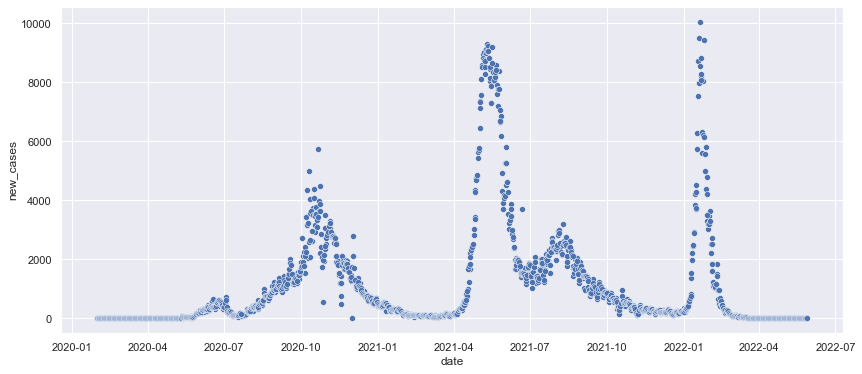

In [177]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

In [178]:
new_data[new_data['date'] > '20-03-22'].describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,0.0,69.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,69.0,6.900000e+01,6.900000e+01,6.900000e+01,69.000000,69.0,0.0,0.0
mean,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738269.000000,140.0,NaN,NaN
std,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8.946853e-16,8.946853e-16,2.236713e-16,20.062403,0.0,NaN,NaN
min,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738235.000000,140.0,NaN,NaN
25%,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738252.000000,140.0,NaN,NaN
50%,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738269.000000,140.0,NaN,NaN
75%,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738286.000000,140.0,NaN,NaN
max,NaN,22.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29674920.0,25.0,5.809000e+00,3.212000e+00,6.020000e-01,738303.000000,140.0,NaN,NaN


In [179]:
# Третий пример работы регрессионной модели
new_data = df[df['location'] == 'India'][df.columns]

In [199]:
new_data['date'] = pd.to_datetime(new_data['date'],format='%Y.%m.%d') 

In [181]:
new_data

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level,location,continent,date
65629,3.0,0.0,0.429,91.0,0.0,1.714,0.002,0.000,0.000,246.752,5306.0,70.0,10.0,1.393409e+09,28.2,5.989,3.414,0.645,737460,91,1,0,India,Asia,2020-02-05
65630,3.0,0.0,0.286,91.0,0.0,1.714,0.002,0.000,0.000,246.752,5306.0,70.0,10.0,1.393409e+09,28.2,5.989,3.414,0.645,737461,91,1,0,India,Asia,2020-02-06
65631,3.0,0.0,0.286,91.0,0.0,1.714,0.002,0.000,0.000,246.752,5306.0,70.0,10.0,1.393409e+09,28.2,5.989,3.414,0.645,737462,91,1,0,India,Asia,2020-02-07
65632,3.0,0.0,0.286,91.0,0.0,1.714,0.002,0.000,0.000,246.752,5306.0,70.0,10.0,1.393409e+09,28.2,5.989,3.414,0.645,737463,91,1,0,India,Asia,2020-02-08
65633,3.0,0.0,0.143,91.0,0.0,1.714,0.002,0.000,0.000,246.752,5306.0,70.0,10.0,1.393409e+09,28.2,5.989,3.414,0.645,737464,91,1,0,India,Asia,2020-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66399,43001477.0,2539.0,3058.571,516132.0,60.0,96.143,30860.627,1.822,2.195,370.410,802173.0,1783656.0,190669.0,1.393409e+09,28.2,5.989,3.414,0.645,738230,91,1,2,India,Asia,2022-03-16
66400,43004005.0,2528.0,2820.571,516281.0,149.0,81.000,30862.442,1.814,2.024,370.516,802173.0,1795944.0,264864.0,1.393409e+09,28.2,5.989,3.414,0.645,738231,91,1,2,India,Asia,2022-03-17
66401,43006080.0,2075.0,2600.714,516352.0,71.0,78.429,30863.931,1.489,1.866,370.567,802173.0,1573173.0,295615.0,1.393409e+09,28.2,5.989,3.414,0.645,738232,91,1,2,India,Asia,2022-03-18
66402,43007841.0,1761.0,2407.143,516479.0,127.0,89.857,30865.195,1.264,1.728,370.659,802173.0,1580159.0,353268.0,1.393409e+09,28.2,5.989,3.414,0.645,738233,91,1,2,India,Asia,2022-03-19


In [182]:
new_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,7.750000e+02,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,775.00000,775.0,775.0,775.000000
mean,1.744473e+07,55495.983226,55488.254745,229945.636129,659.761290,657.358155,12519.463710,39.827495,39.821930,176.164494,1.008863e+06,2.332771e+06,1.252290e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737847.00000,91.0,1.0,1.305806
std,1.488889e+07,81951.254138,81221.648695,188109.157873,885.064323,853.074652,10685.224292,58.813501,58.289889,131.042277,6.327120e+05,2.801056e+06,1.596103e+06,0.000000e+00,7.110016e-15,8.887520e-16,4.443760e-16,1.110940e-16,223.86752,0.0,0.0,0.952709
min,3.000000e+00,0.000000,0.000000,1.000000,0.000000,0.286000,0.002000,0.000000,0.000000,0.001000,1.121000e+03,7.000000e+01,1.000000e+01,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737460.00000,91.0,1.0,0.000000
25%,2.675172e+06,10362.500000,10877.428500,51359.000000,161.500000,179.857000,1919.875500,7.436500,7.806500,63.447500,6.704070e+05,7.000000e+01,1.000000e+01,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737653.50000,91.0,1.0,0.000000
50%,1.107998e+07,27409.000000,29355.000000,156938.000000,391.000000,392.857000,7951.706000,19.670000,21.067000,117.776000,1.063182e+06,4.600750e+05,2.899200e+05,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737847.00000,91.0,1.0,2.000000
75%,3.311835e+07,56753.000000,58288.500000,441580.000000,731.500000,783.714500,23767.859000,40.730000,41.831500,316.906500,1.512336e+06,4.742464e+06,2.296798e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,738040.50000,91.0,1.0,2.000000
max,4.300939e+07,414188.000000,391232.000000,516510.000000,4529.000000,4190.000000,30866.306000,297.248000,280.773000,370.681000,3.080396e+06,1.003800e+07,6.785334e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,738234.00000,91.0,1.0,2.000000


In [183]:
sns.set(rc={"figure.figsize":(14, 6)})

## График без продления

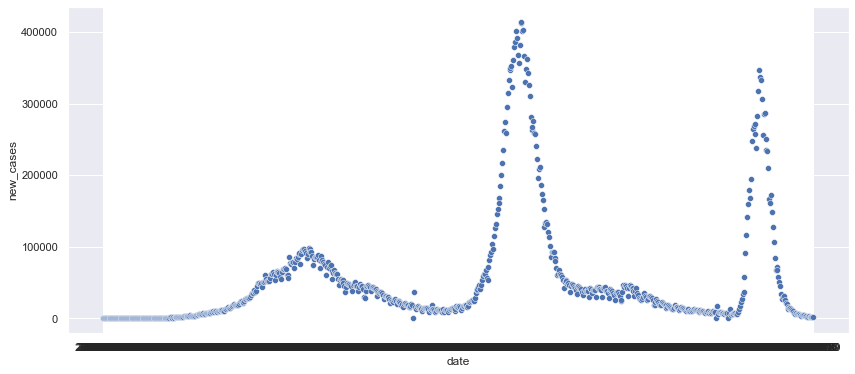

In [184]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

## Добавлнение новых дат

In [185]:
new_data['date'] = pd.to_datetime(new_data['date']) 

In [186]:
pred_df = pd.DataFrame(columns=['Code_Location', 'dateAsInt', 'population', 'median_age', 'aged_65_older', 'aged_70_older', 'human_development_index', 'location', 'new_cases', 'date'])
for i in range(70):
    #Прибавление дня к предыдущей строке
    pred_df['date'] = new_data['date'] + pd.to_timedelta(i,unit='d')
    pred_df['location'] = df['location']

## Дата в int

In [187]:
pred_df['human_development_index'] = new_data['human_development_index']

In [188]:
pred_df['Code_Location'] = new_data['Code_Location']

In [189]:
pred_df['dateAsInt'] = pred_df['date'].apply(lambda x:x.toordinal())

In [190]:
pred_df['population'] = new_data['population']

In [191]:
pred_df['median_age'] = new_data['median_age']
pred_df['aged_65_older'] = new_data['aged_65_older']
pred_df['aged_70_older'] = new_data['aged_70_older']

In [192]:
pred_df.head()

,Code_Location,dateAsInt,population,median_age,aged_65_older,aged_70_older,human_development_index,location,new_cases,date
65629,91,737529,1.393409e+09,28.2,5.989,3.414,0.645,India,NaN,2020-04-14
65630,91,737530,1.393409e+09,28.2,5.989,3.414,0.645,India,NaN,2020-04-15
65631,91,737531,1.393409e+09,28.2,5.989,3.414,0.645,India,NaN,2020-04-16
65632,91,737532,1.393409e+09,28.2,5.989,3.414,0.645,India,NaN,2020-04-17
65633,91,737533,1.393409e+09,28.2,5.989,3.414,0.645,India,NaN,2020-04-18


## Предсказывание с помощью модели

In [193]:
pred_df['new_cases'] = forest.predict(pred_df.drop(columns=['new_cases', 'location', 'date'], axis=1))

In [194]:
#pred_df.drop(columns=['location', 'dateAsInt'], inplace=True)

In [195]:
new_data = new_data.append(pred_df)

C:\Users\1\AppData\Local\Temp\ipykernel_1012\2287257286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(pred_df)


In [196]:
new_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,7.750000e+02,1550.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02,7.750000e+02,7.750000e+02,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1550.000000,1550.0,775.0,775.000000
mean,1.744473e+07,55579.882465,55488.254745,229945.636129,659.761290,657.358155,12519.463710,39.827495,39.821930,176.164494,1.008863e+06,2.332771e+06,1.252290e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737881.500000,91.0,1.0,1.305806
std,1.488889e+07,81593.099044,81221.648695,188109.157873,885.064323,853.074652,10685.224292,58.813501,58.289889,131.042277,6.327120e+05,2.801056e+06,1.596103e+06,0.000000e+00,7.107721e-15,8.884651e-16,4.442325e-16,1.110581e-16,226.440568,0.0,0.0,0.952709
min,3.000000e+00,0.000000,0.000000,1.000000,0.000000,0.286000,0.002000,0.000000,0.000000,0.001000,1.121000e+03,7.000000e+01,1.000000e+01,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737460.000000,91.0,1.0,0.000000
25%,2.675172e+06,10496.820000,10877.428500,51359.000000,161.500000,179.857000,1919.875500,7.436500,7.806500,63.447500,6.704070e+05,7.000000e+01,1.000000e+01,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737688.000000,91.0,1.0,0.000000
50%,1.107998e+07,28482.620000,29355.000000,156938.000000,391.000000,392.857000,7951.706000,19.670000,21.067000,117.776000,1.063182e+06,4.600750e+05,2.899200e+05,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,737881.500000,91.0,1.0,2.000000
75%,3.311835e+07,57984.870000,58288.500000,441580.000000,731.500000,783.714500,23767.859000,40.730000,41.831500,316.906500,1.512336e+06,4.742464e+06,2.296798e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,738075.000000,91.0,1.0,2.000000
max,4.300939e+07,414188.000000,391232.000000,516510.000000,4529.000000,4190.000000,30866.306000,297.248000,280.773000,370.681000,3.080396e+06,1.003800e+07,6.785334e+06,1.393409e+09,2.820000e+01,5.989000e+00,3.414000e+00,6.450000e-01,738303.000000,91.0,1.0,2.000000


## График с предсказанием

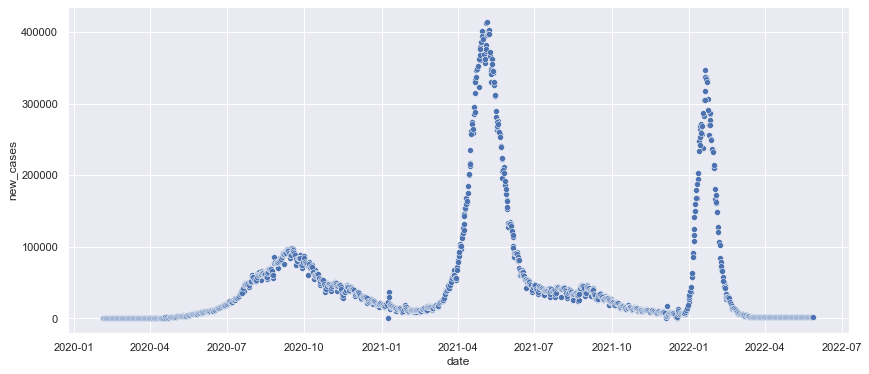

In [197]:
sns.scatterplot(data=new_data, x='date', y='new_cases');

In [198]:
new_data[new_data['date'] > '20-03-22'].describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,median_age,aged_65_older,aged_70_older,human_development_index,dateAsInt,Code_Location,Code_Continent,level
count,0.0,6.900000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.900000e+01,69.0,6.900000e+01,6.900000e+01,6.900000e+01,69.000000,69.0,0.0,0.0
mean,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738269.000000,91.0,NaN,NaN
std,NaN,4.580789e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.0,2.684056e-15,4.473427e-16,2.236713e-16,20.062403,0.0,NaN,NaN
min,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738235.000000,91.0,NaN,NaN
25%,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738252.000000,91.0,NaN,NaN
50%,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738269.000000,91.0,NaN,NaN
75%,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738286.000000,91.0,NaN,NaN
max,NaN,1.734520e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393409e+09,28.2,5.989000e+00,3.414000e+00,6.450000e-01,738303.000000,91.0,NaN,NaN


# Сохранение модели

In [201]:
pickle.dump(forest, open("forest.pkl", "wb"))

# 3.3 Подготовка отчета

## 3.1 Были обучены несколько моделей регрессии и выбрана наилучшая

## 3.2 Были визуализированы данные (с применением и без обученной модели) Афганистана

## По результатам текущей сессии была получена обученная модель линейной регрессии